In [ ]:
import pandas as pd
import nltk
!pip install PySastrawi
#!pip install nlp_id

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 4.2 MB/s eta 0:00:00


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
import re, string, unicodedata  #modul regular expression
from nltk import word_tokenize, sent_tokenize  #Paket ini membagi teks input menjadi kata-kata.,
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


INPUT DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#df = pd.read_csv('drive/MyDrive/TESIS/data/Berita1-28.csv')
df = pd.read_csv('news.csv')
#df= pd.read_excel('Berita Terkini Jogja Hari Ini Januari2.xlsx')

In [ ]:
df

Casefolding, Remove Punctuation, Remove Whitespace, Tokenisasi

In [ ]:
#preprocessing
def removeStopword(str):
    stop_words = set(stopwords.words('indonesian'))
    word_tokens = word_tokenize(str)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)
#remove sentence which contains only one word
def removeSentence(str):
    word = str.split()
    wordCount = len(word)
    if(wordCount<=1):
        str = ''

    return str
def cleaning(str):
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    #to lowercase
    str = str.lower()
    #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)

    return str
def preprocessing(str):
    str = removeSentence(str)
    str = cleaning(str)
    str = removeStopword(str)

    return str

Sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

PREPROCESSING

In [ ]:

df = df.dropna()
df

In [ ]:
df['cleaned_text']=df['Field2'].apply(preprocessing)
df

In [ ]:
df['removesentence']=df['Field2'].apply(removeSentence)

<ipython-input-13-7c2d2570a35e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['removesentence']=df['Field2'].apply(removeSentence)


In [ ]:
df

In [ ]:
df['cleaning']=df['removesentence'].apply(cleaning)
df

In [ ]:
ddf['stem_text']=df['cleaned_text'].apply(stemmer.stem)

<ipython-input-30-f131b5d479e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stem_text']=df['cleaned_text'].apply(stemmer.stem)


In [ ]:
def remove_word_from_text(text, word_to_remove):
    words = text.split()
    filtered_words = [word for word in words if word != word_to_remove]
    new_text = ' '.join(filtered_words)
    return new_text

kata_yang_dihapus = 'inews'
kata_yang_dihapus2 ='id'
kata_yang_dihapus3 ='inewsyogya'

df['stem_text'] = df['stem_text'].apply(lambda x: remove_word_from_text(x, kata_yang_dihapus))
df['stem_text'] = df['stem_text'].apply(lambda x: remove_word_from_text(x, kata_yang_dihapus2))
df['stem_text'] = df['stem_text'].apply(lambda x: remove_word_from_text(x, kata_yang_dihapus3))

In [ ]:
df.drop(['Title'],axis=1,inplace=True)
df.drop(['Title_URL'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['date1'],axis=1,inplace=True)
df.drop(['margin10pxleft'],axis=1,inplace=True)
df.drop(['Title1'],axis=1,inplace=True)
df.drop(['Text'],axis=1,inplace=True)
df.drop(['Field2'],axis=1,inplace=True)
df.drop(['cleaned_text'],axis=1,inplace=True)

In [ ]:
df
df.to_csv('drive/MyDrive/TESIS/dbclean/Berita10-7clean.csv')

In [ ]:
df

**TOPIC MODELLING LDA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#df = pd.read_csv('berita1bulanclean.csv')

Mounted at /content/drive


In [ ]:
#df = pd.read_csv('drive/MyDrive/TESIS/beritamingguclean.csv')
#df = pd.read_csv('data2m.csv')
df = pd.read_csv('drive/MyDrive/TESIS/dataclean/Berita12-30clean.csv')

In [ ]:
df

,Unnamed: 0,stem_text
0,0,yogyakarta usaha mikro tengah umkm milik peran...
1,1,gunungkidul perintah kabupaten gunungkidul tut...
2,2,yogyakarta indonesia milik tinggal candi salah...
3,3,washington gara gara tolak vaksin covid ratus ...
4,4,yogyakarta universitas gadjah mada ugm terjun ...
...,...,...
336,337,bantul unjung objek wisata pantai parangtritis...
337,338,mesuji badan narkotika nasional bnn bekuk oknu...
338,339,yogyakarta enam remaja laku klitih kriminal ja...
339,340,beijing gara gara langgar atur batas covid ora...


In [ ]:
text = df['stem_text']
text_list =  [i.split() for i in text]

In [ ]:
text_list

[['yogyakarta',
  'usaha',
  'mikro',
  'tengah',
  'umkm',
  'milik',
  'peran',
  'strategis',
  'ekonomi',
  'diy',
  'sektor',
  'cipta',
  'peluang',
  'usaha',
  'buka',
  'lapang',
  'kerja',
  'persen',
  'ekonomi',
  'diy',
  'gerak',
  'sektor',
  'umkm',
  'ribu',
  'laku',
  'umkm',
  'hadap',
  'kendala',
  'kembang',
  'usaha',
  'sinergitas',
  'umkm',
  'elemen',
  'kembang',
  'dukung',
  'ekonomi',
  'diy',
  'kepala',
  'bidang',
  'ukm',
  'dinas',
  'koperasi',
  'ukm',
  'diy',
  'tatik',
  'ratnawati',
  'talkshow',
  'mitra',
  'latih',
  'umkm',
  'manfaat',
  'omah',
  'mitra',
  'kantor',
  'komisi',
  'awas',
  'saing',
  'usaha',
  'kppu',
  'diy',
  'jateng',
  'jumat',
  'tatik',
  'apresiasi',
  'langkah',
  'kppu',
  'bina',
  'umkm',
  'gandeng',
  'aplikasi',
  'grab',
  'peran',
  'dukung',
  'antar',
  'produk',
  'jual',
  'umkm',
  'giat',
  'tingkat',
  'sejahtera',
  'masyarakat',
  'kurang',
  'angka',
  'anggur',
  'miskin',
  'editor',
  'kun

In [ ]:
import gensim
#Create Bigram & Trigram Models
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [ ]:
text_list

[['yogyakarta',
  'usaha',
  'mikro',
  'tengah',
  'umkm',
  'milik',
  'peran',
  'strategis',
  'ekonomi',
  'diy',
  'sektor',
  'cipta',
  'peluang',
  'usaha',
  'buka',
  'lapang',
  'kerja',
  'persen',
  'ekonomi',
  'diy',
  'gerak',
  'sektor',
  'umkm',
  'ribu',
  'laku',
  'umkm',
  'hadap',
  'kendala',
  'kembang',
  'usaha',
  'sinergitas',
  'umkm',
  'elemen',
  'kembang',
  'dukung',
  'ekonomi',
  'diy',
  'kepala',
  'bidang',
  'ukm',
  'dinas',
  'koperasi',
  'ukm',
  'diy',
  'tatik',
  'ratnawati',
  'talkshow',
  'mitra',
  'latih',
  'umkm',
  'manfaat',
  'omah',
  'mitra',
  'kantor',
  'komisi',
  'awas',
  'saing',
  'usaha',
  'kppu',
  'diy',
  'jateng',
  'jumat',
  'tatik',
  'apresiasi',
  'langkah',
  'kppu',
  'bina',
  'umkm',
  'gandeng',
  'aplikasi',
  'grab',
  'peran',
  'dukung',
  'antar',
  'produk',
  'jual',
  'umkm',
  'giat',
  'tingkat',
  'sejahtera',
  'masyarakat',
  'kurang',
  'angka',
  'anggur',
  'miskin',
  'editor',
  'kun

In [ ]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2)
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary<1278 unique tokens: ['angka', 'antar', 'aplikasi', 'apresiasi', 'awas']...>


In [ ]:
#https://radimrehurek.com/gensim/tut1.html
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word,
converts the word to its integer word id and returns the result as a sparse vector.
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”,
the words computer (id 0) and human (id 1) appear once;
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

341
[(56, 1), (83, 1), (84, 5), (91, 1), (111, 1), (114, 1), (118, 1), (123, 3), (124, 6), (148, 2), (194, 1), (256, 1), (271, 11), (287, 1), (306, 1), (312, 1), (337, 2), (380, 1), (386, 3), (472, 1), (565, 3), (576, 2), (577, 2), (583, 2), (594, 3), (597, 6), (620, 3), (634, 1), (641, 1), (750, 2), (759, 1), (820, 2), (824, 1), (854, 1), (946, 1), (959, 1), (998, 1), (1006, 1), (1028, 1), (1029, 6), (1045, 1), (1068, 2), (1079, 4), (1092, 1), (1094, 1), (1096, 1), (1139, 1)]


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,
                                           iterations=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=300,
                                           passes=10,
                                           alpha='auto',
                                           eta='auto',
                                           minimum_probability=0.0,
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        #perplexity_lda = model.log_perplexity(cp)
        #perplexity_list.append(perplexity_lda)

    return model_list, coherence_values

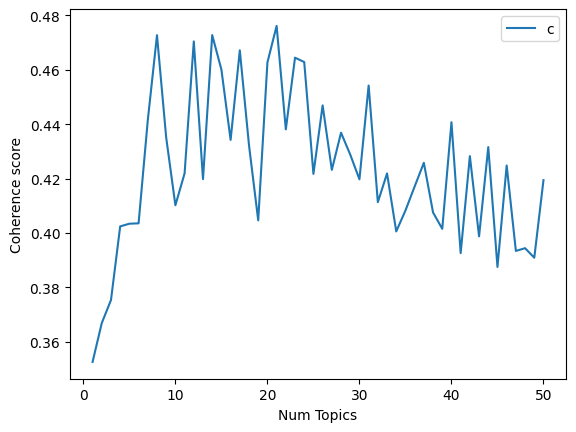

In [ ]:
#cp = corpus
start=1
limit=51
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf,
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:

# Print the coherence scores
hasil = pd.DataFrame()
for m, cv in zip(x, coherence_values):
    print(round(cv, 6))
    hasil = hasil.append({'CV': cv}, ignore_index=True)


hasil
hasil.to_csv('LDA10.csv')

0.352555
0.36685
0.375311
0.402407
0.403398
0.403533
0.441465
0.472733
0.435078
0.410163
0.421919
0.470445
0.419787
0.472785
0.460089
0.434228
0.467171
0.432222
0.404625
0.462711
0.476146
0.4381
0.464468
0.462856
0.421718
0.446914
0.423207
0.436868
0.42882
0.419725
0.454228
0.411318
0.421892
0.400556
0.408248
0.417093
0.425797
0.407518
0.401515
0.440713
0.392578
0.428257
0.398748
0.431578
0.387492
0.424809
0.393373
0.394393
0.390886
0.41942


<ipython-input-72-8d1b3c0d4016>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil = hasil.append({'CV': cv}, ignore_index=True)
<ipython-input-72-8d1b3c0d4016>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil = hasil.append({'CV': cv}, ignore_index=True)
<ipython-input-72-8d1b3c0d4016>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil = hasil.append({'CV': cv}, ignore_index=True)
<ipython-input-72-8d1b3c0d4016>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil = hasil.append({'CV': cv}, ignore_index=True)
<ipython-input-72-8d1b3c0d4016>:5: FutureWarning: The frame.append method is deprecated and will be removed from



LDA 100



In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,
                                           iterations=100,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=300,
                                           passes=10,
                                           alpha='auto',
                                           eta='auto',
                                           minimum_probability=0.0,
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        #perplexity_lda = model.log_perplexity(cp)
        #perplexity_list.append(perplexity_lda)

    return model_list, coherence_values

In [ ]:
#cp = corpus
start=1
limit=51
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf,
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
hasil = pd.DataFrame()
for m, cv in zip(x, coherence_values):
    print(round(cv, 6))
    hasil = hasil.append({'CV': cv}, ignore_index=True)


hasil
hasil.to_csv('LDA100.csv')

LDA 1000

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,
                                           iterations=1000,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=300,
                                           passes=10,
                                           alpha='auto',
                                           eta='auto',
                                           minimum_probability=0.0,
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        #perplexity_lda = model.log_perplexity(cp)
        #perplexity_list.append(perplexity_lda)

    return model_list, coherence_values

In [ ]:
#cp = corpus
start=1
limit=51
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf,
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
hasil = pd.DataFrame()
for m, cv in zip(x, coherence_values):
    print(round(cv, 6))
    hasil = hasil.append({'CV': cv}, ignore_index=True)


hasil
hasil.to_csv('LDA1000.csv')

LSA

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.lsimodel import LsiModel

#function to compute coherence values
def compute_coherence_valuesLSA(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        #dictionary,doc_term_matrix=prepare_corpus(doc_clean)
        model = LsiModel(corpus=corpus, num_topics=num_topics, id2word = dictionary)
        #vector = model[corpus]
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

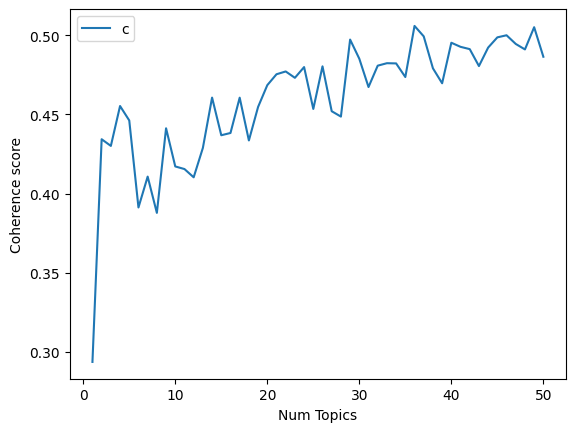

In [ ]:
start=1
limit=51
step=1
model_list, coherence_values = compute_coherence_valuesLSA(dictionary, corpus=corpus_tfidf,
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
hasil = pd.DataFrame()
for m, cv in zip(x, coherence_values):
    print(round(cv, 6))
    hasil = hasil.append({'CV': cv}, ignore_index=True)
hasil.to_csv('LSA.csv')

0.293672
0.434343
0.430121
0.455324
0.446202
0.391232
0.410731
0.387811
0.441271
0.417157
0.415507
0.410296
0.42886
0.460644
0.436862
0.438287
0.460602
0.433581
0.454744
0.468498
0.475388
0.477161
0.473141
0.479924
0.453476
0.480392
0.452039
0.448645
0.4973
0.485181
0.467319
0.480814
0.482371
0.482236
0.473638
0.505921
0.499322
0.479144
0.46969
0.495296
0.492715
0.491263
0.480565
0.492236
0.498693
0.500019
0.494538
0.491073
0.505114
0.486444


<ipython-input-75-4cd17b49b029>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil = hasil.append({'CV': cv}, ignore_index=True)
<ipython-input-75-4cd17b49b029>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil = hasil.append({'CV': cv}, ignore_index=True)
<ipython-input-75-4cd17b49b029>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil = hasil.append({'CV': cv}, ignore_index=True)
<ipython-input-75-4cd17b49b029>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil = hasil.append({'CV': cv}, ignore_index=True)
<ipython-input-75-4cd17b49b029>:4: FutureWarning: The frame.append method is deprecated and will be removed from

Generate Data

In [ ]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=5,
                                           iterations=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=300,
                                           passes=10,
                                           alpha='auto',
                                           eta='auto',
                                           minimum_probability=0.0,
                                           per_word_topics=True) #num topic menye
topik = pd.DataFrame()
for idx, topic in model.print_topics(-1):
    print('Topik: {} {}'.format(idx, topic))
    topik = topik.append({'Topic:': topic}, ignore_index=True)

Topik: 0 0.018*"semarang" + 0.016*"harga" + 0.014*"tinggi" + 0.014*"air" + 0.013*"banjir" + 0.012*"pria" + 0.012*"genang" + 0.011*"media_sosial" + 0.010*"hujan" + 0.010*"partai"
Topik: 1 0.017*"jarak_luncur" + 0.013*"amplitudo_mm" + 0.012*"kereta_api" + 0.012*"awan_panas" + 0.012*"lava_pijar" + 0.011*"gunung_rapi" + 0.011*"gugur_lava" + 0.011*"barat_daya" + 0.009*"kereta" + 0.008*"lava"
Topik: 2 0.013*"asn" + 0.010*"tes" + 0.009*"lingkung" + 0.009*"swab" + 0.006*"pcr" + 0.006*"klaster" + 0.006*"orang_camat" + 0.006*"positif_covid" + 0.006*"virus_corona" + 0.005*"dinkes"
Topik: 3 0.019*"korban" + 0.011*"narkoba" + 0.010*"barang_bukti" + 0.010*"polda_diy" + 0.010*"polisi" + 0.009*"laku" + 0.008*"tinggal_dunia" + 0.007*"diy" + 0.007*"buah" + 0.007*"polres"
Topik: 4 0.008*"tangan_covid" + 0.007*"bantul" + 0.007*"anggota_polri" + 0.007*"polri" + 0.006*"dagang" + 0.006*"ppkm_mikro" + 0.006*"makam" + 0.006*"bantu" + 0.005*"kulonprogo" + 0.005*"penjara"


<ipython-input-37-6acb6ac61bc0>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topik = topik.append({'Topic:': topic}, ignore_index=True)
<ipython-input-37-6acb6ac61bc0>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topik = topik.append({'Topic:': topic}, ignore_index=True)
<ipython-input-37-6acb6ac61bc0>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topik = topik.append({'Topic:': topic}, ignore_index=True)
<ipython-input-37-6acb6ac61bc0>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topik = topik.append({'Topic:': topic}, ignore_index=True)
<ipython-input-37-6acb6ac61bc0>:14: FutureWarning: The frame.append method is de

In [ ]:
topik.to_csv('drive/MyDrive/TESIS/topik/2-25Topik.csv')

In [ ]:
model = LsiModel(corpus=corpus_tfidf, num_topics=4, id2word = dictionary)

topik = pd.DataFrame()
for idx, topic in model.print_topics(-1):
    print('Topik: {} {}'.format(idx, topic))
    topik = topik.append({'Topic:': topic}, ignore_index=True)

Topik: 0 -0.166*"kota_yogyakarta" + -0.165*"bantul" + -0.165*"korban" + -0.156*"tangan_covid" + -0.135*"rumah_sakit" + -0.118*"positif_covid" + -0.115*"kulonprogo" + -0.113*"tambah" + -0.112*"pasien" + -0.108*"kabupaten_bantul"
Topik: 1 0.235*"gunung_rapi" + 0.199*"gugur_lava" + 0.197*"korban" + 0.190*"jarak_luncur" + 0.149*"barat_daya" + 0.143*"amplitudo_mm" + 0.142*"awan_panas" + -0.140*"tangan_covid" + 0.140*"lava_pijar" + 0.133*"kubah_lava"
Topik: 2 0.252*"gunung_rapi" + -0.249*"korban" + 0.212*"gugur_lava" + 0.204*"jarak_luncur" + 0.161*"barat_daya" + -0.157*"kendara_sepeda" + 0.153*"amplitudo_mm" + 0.151*"awan_panas" + 0.150*"lava_pijar" + -0.148*"barang_bukti"
Topik: 3 -0.283*"vaksinasi" + -0.227*"tenaga_sehat" + -0.225*"vaksinasi_covid" + 0.212*"orang_camat" + -0.198*"layan_publik" + -0.192*"dagang_pasar" + 0.179*"positif_covid" + -0.176*"vaksin" + 0.144*"korban" + 0.132*"bantul"


<ipython-input-32-d0609b4d21c4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topik = topik.append({'Topic:': topic}, ignore_index=True)
<ipython-input-32-d0609b4d21c4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topik = topik.append({'Topic:': topic}, ignore_index=True)
<ipython-input-32-d0609b4d21c4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topik = topik.append({'Topic:': topic}, ignore_index=True)
<ipython-input-32-d0609b4d21c4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topik = topik.append({'Topic:': topic}, ignore_index=True)


In [ ]:
topik.to_csv('drive/MyDrive/TESIS/topik/2-25TopikLSA.csv')

In [ ]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("drive/MyDrive/TESIS/topik/12-30top_words2.csv")
print(df)

None


In [ ]:
tw= pd.read_csv('top_words2.csv')
tw

,Unnamed: 0,Topic,Word,P
0,0,0,awan_panas,0.015468
1,1,0,batas_giat,0.012994
2,2,0,batas,0.012069
3,3,0,instruksi_bupati,0.009993
4,4,0,protokol_sehat,0.009914
...,...,...,...,...
95,95,9,pemda,0.003643
96,96,9,anggar,0.003641
97,97,9,pasal,0.003556
98,98,9,anak,0.003552


In [ ]:
# from gensim.models.coherencemodel import CoherenceModel
# cm = CoherenceModel(topics=topic, corpus=corpus, dictionary=dictionary, coherence='u_mass')
# coherence = cm.get_coherence()  # get coherence value